## KING COUNTY HOUSE SALES DATASET ANALYSIS

### Project Overview

#### Introduction
This project aims to analyze the King County House Sales dataset to uncover insights into the real estate market in King County, Washington. By leveraging data science and machine learning techniques, we seek to understand the factors that influence house prices and provide stakeholders, such as real estate agencies and homeowners, with actionable advice on how home renovations might affect property values.

#### Objectives
- **Data Exploration**: Conduct a thorough exploratory data analysis (EDA) to understand the dataset's characteristics, including distributions, correlations, and patterns.
- **Feature Engineering**: Identify and create relevant features that could significantly impact house prices, based on the dataset and domain knowledge.
- **Model Development**: Build and refine predictive models to estimate house prices based on various features, including location, property attributes, and renovation details.
- **Insights and Recommendations**: Provide insights into how different features influence house prices and offer data-driven recommendations to stakeholders on potential home improvements or investment strategies.

#### Dataset Description
The dataset, `kc_house_data.csv`, contains sales prices of houses in King County, Washington, along with various attributes such as the number of bedrooms, bathrooms, square footage, and more. A separate file, `column_names.md`, provides a description of the column names.

#### Business Problem
The primary business problem focuses on assisting a real estate agency that aids homeowners in buying or selling homes. Specifically, the project seeks to answer how home renovations or improvements can increase the estimated value of homes and by what margin. This information will empower the agency to provide better advice to their clients, potentially leading to more profitable sales and satisfied customers.

#### Methodology
The project will follow a structured data science process, including:
1. **Data Collection**: Gathering the necessary data from the provided dataset.
2. **Data Cleaning and Preparation**: Cleaning the data to handle missing values, outliers, and incorrect data types.
3. **Exploratory Data Analysis (EDA)**: Analyzing the data to find patterns, relationships, and insights.
4. **Modeling**: Building predictive models to estimate house prices based on selected features.
5. **Evaluation**: Assessing the models' performance using appropriate metrics.
6. **Interpretation**: Drawing conclusions from the model results and providing recommendations.

#### Deliverables
- **Jupyter Notebook**: Contains all the code, analysis, and model development, demonstrating an iterative approach to modeling.
- **GitHub Repository**: Hosts the project code, dataset, and any additional resources.
- **Non-Technical Presentation**: Summarizes the findings and recommendations in a format accessible to stakeholders without a technical background.

This overview sets the stage for your project, outlining its scope, objectives, and the approach you plan to take.

To start your Jupyter Notebook ([`alex.ipynb`](command:_github.copilot.openRelativePath?%5B%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fhome%2Falex%2FDocuments%2FFlatiron%2Fcourse%2Fphase_2%2FLinear-Regression-GRP16%2Falex.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%5D "/home/alex/Documents/Flatiron/course/phase_2/Linear-Regression-GRP16/alex.ipynb")) for the King County House Sales dataset analysis, you'll want to structure your notebook to follow the data science process: data collection, data cleaning, exploratory data analysis (EDA), modeling, and interpretation of results. Here's a step-by-step guide to get you started:

### 1. Import Necessary Libraries
Start by importing the libraries that you'll need for data manipulation, visualization, and modeling.



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



### 2. Load the Dataset
Load the `kc_house_data.csv` file into a pandas DataFrame.



In [6]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287




### 3. Data Overview
Get a basic understanding of the dataset's structure and contents.



In [7]:
print(df.head())  # Display the first few rows of the dataset
print(df.info())  # Get a concise summary of the DataFrame

           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  



### 4. Data Cleaning
Handle missing values, duplicates, and any data type conversions if necessary.



In [8]:
# Example: Drop rows with missing values
# df.dropna(inplace=True)

To clean the data based on the outputs from the data overview, follow these steps in your Jupyter Notebook:

### Step 1: Handle Missing Values
First, identify columns with missing values and decide whether to fill them, drop them, or drop entire rows.



In [9]:
# Check for missing values
print(df.isnull().sum())


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [10]:
# Example: Drop rows with any missing values
df_cleaned = df.dropna()
df_cleaned

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [11]:
# Or, if you prefer to fill missing values, for example, with the median or mean:
# df['column_name'] = df['column_name'].fillna(df['column_name'].median())



### Step 2: Remove Duplicates
Check for and remove any duplicate rows in the dataset to ensure the uniqueness of data.



In [12]:
# Check for duplicate rows
print(f"Duplicate rows: {df_cleaned.duplicated().sum()}")

# Drop duplicates
# df_cleaned = df_cleaned.drop_duplicates()

Duplicate rows: 0




### Step 3: Data Type Conversions
Convert data types if necessary. For example, converting a 'date' column from object type to datetime.



In [13]:
# Example: Convert 'date' column to datetime
# Ensure 'date' column conversion to datetime is done without warnings
df_cleaned.loc[:, 'date'] = pd.to_datetime(df_cleaned['date'])

/home/alex/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)




### Step 4: Additional Cleaning Steps
Based on the initial data overview, you might have noticed other issues that need addressing, such as outliers or incorrect values in certain columns. Handle these as appropriate.



In [14]:
# Example: Removing outliers
# Assuming 'sqft_living' should be within reasonable limits
q_low = df_cleaned['sqft_living'].quantile(0.01)
q_hi  = df_cleaned['sqft_living'].quantile(0.99)
df_cleaned = df_cleaned[(df_cleaned['sqft_living'] > q_low) & (df_cleaned['sqft_living'] < q_hi)]
df_cleaned
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  



After performing these steps, your dataset should be cleaner and more suitable for analysis and modeling. Remember to check the results of each step to ensure the data is cleaned as expected.



### 5. Exploratory Data Analysis (EDA)
Visualize and summarize your data to uncover trends and patterns.



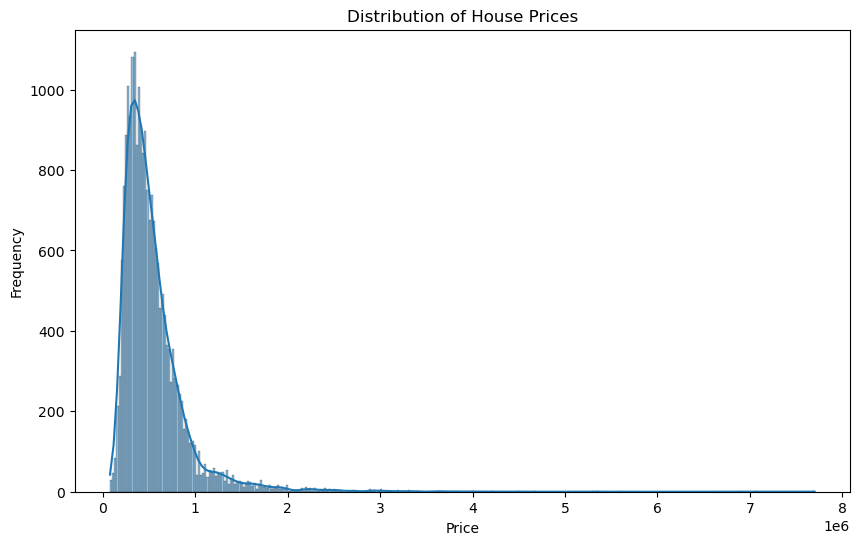

In [15]:
# Example: Plotting distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

For a comprehensive exploratory data analysis (EDA), you can plot various trends in the data to understand the relationships between different variables, distribution of data, and potential outliers. Here's a plan to plot all trends in the data using Python's Pandas and Matplotlib/Seaborn libraries:











1. **Distribution of Target Variable**: Plot the distribution of the target variable (e.g., house prices).


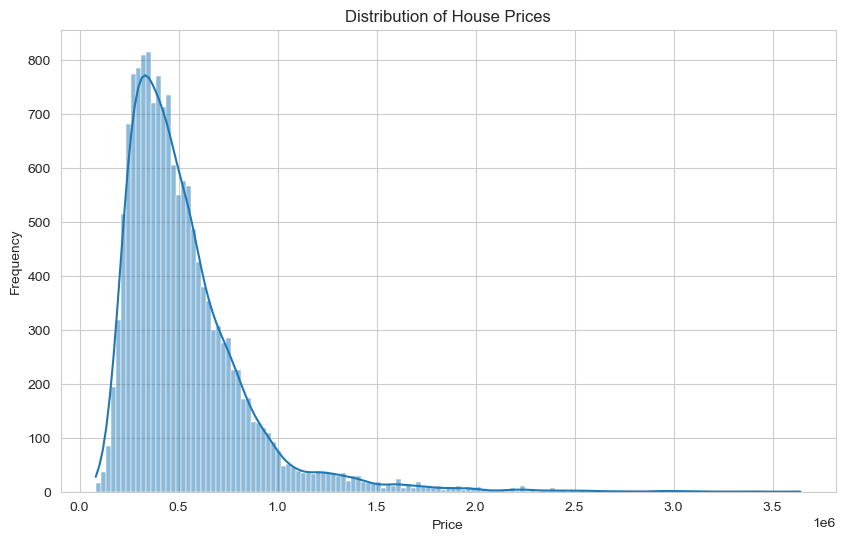

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# 1. Distribution of Target Variable (e.g., 'price')
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

2. **Numerical Variables Trends**: For each numerical variable, plot its distribution to understand its spread and identify any outliers.

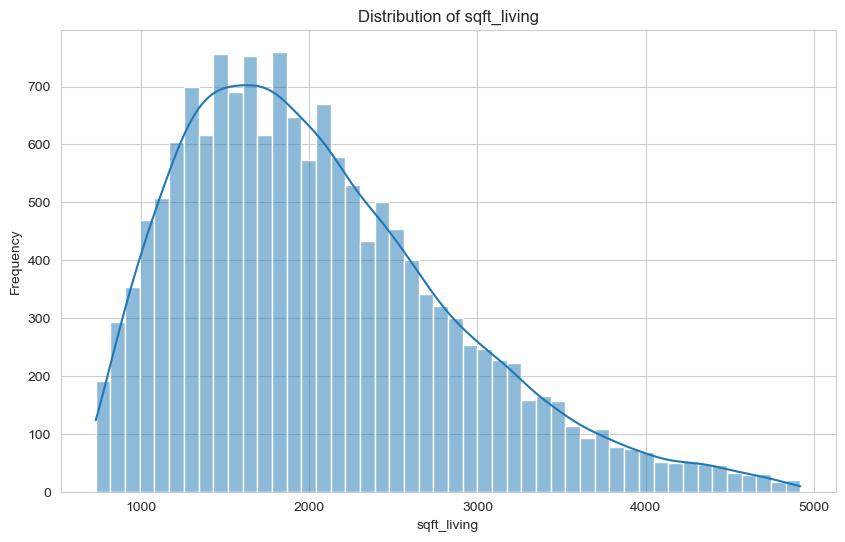

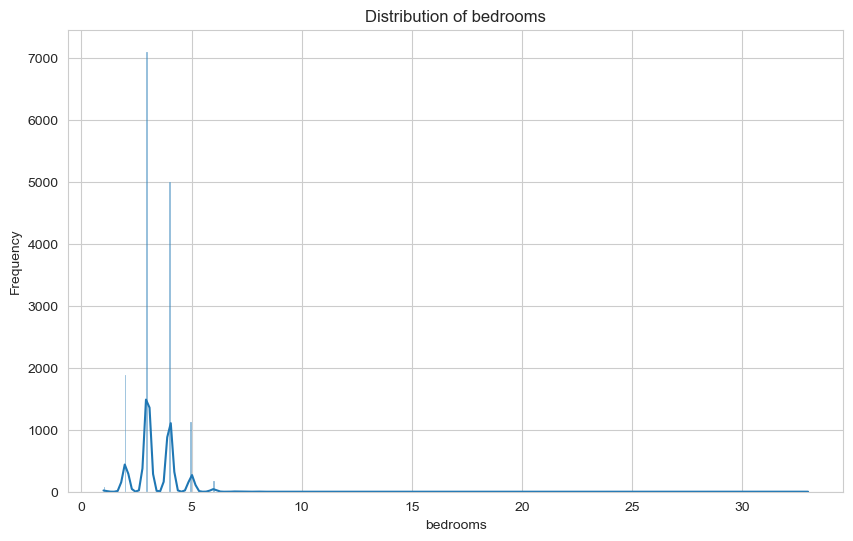

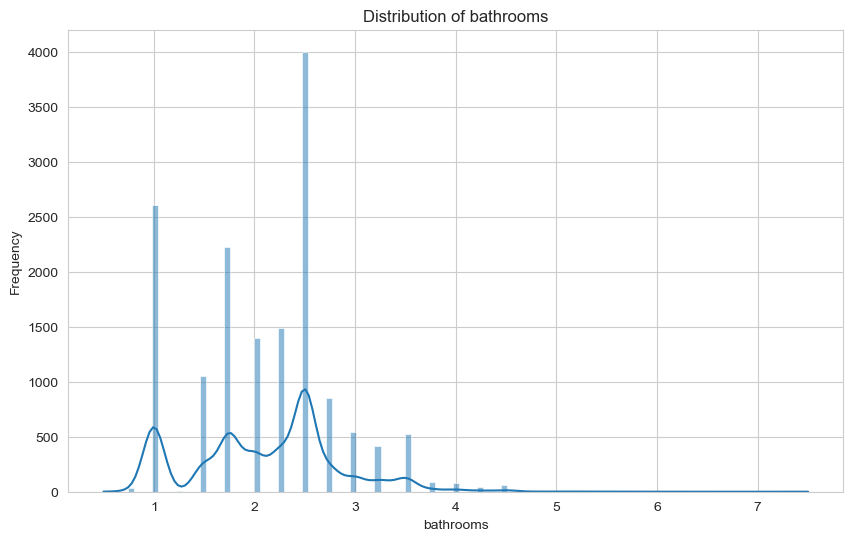

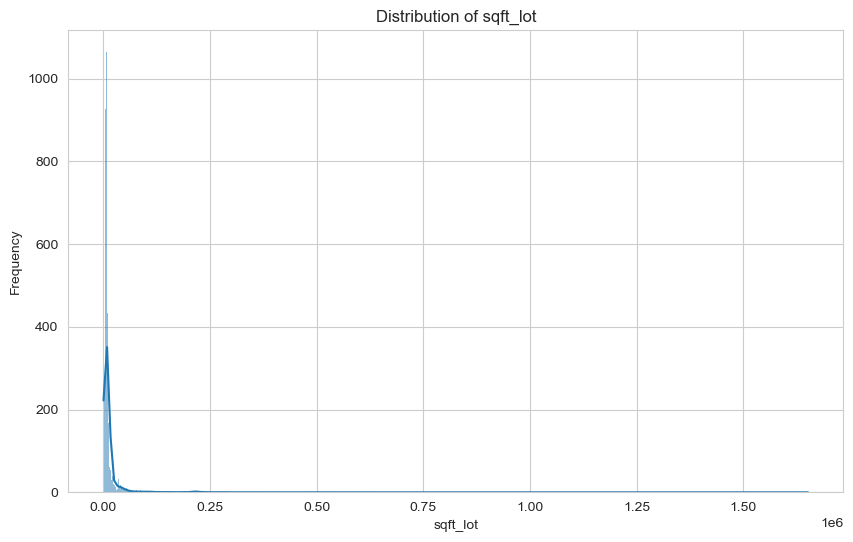

In [17]:
# 2. Numerical Variables Trends
numerical_vars = ['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']  # Example numerical variables
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_cleaned[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


3. **Categorical Variables Trends**: For categorical variables, use count plots to understand the distribution of categories.

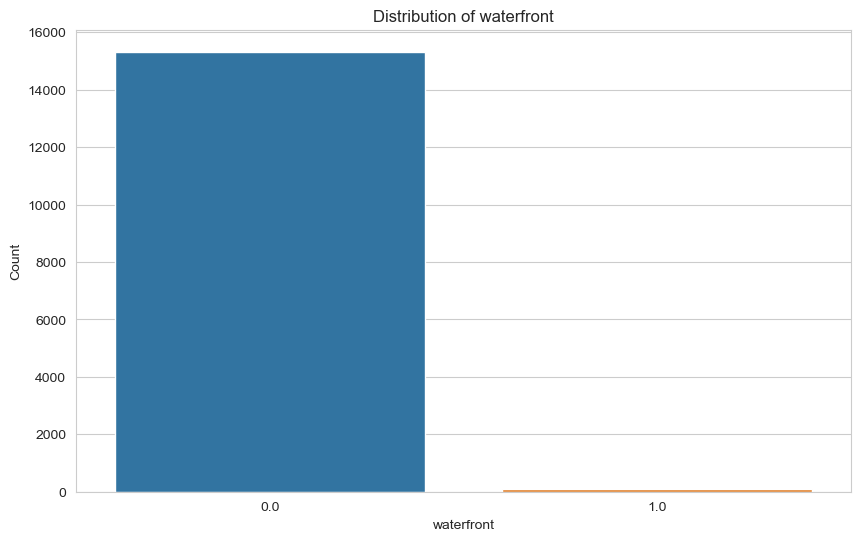

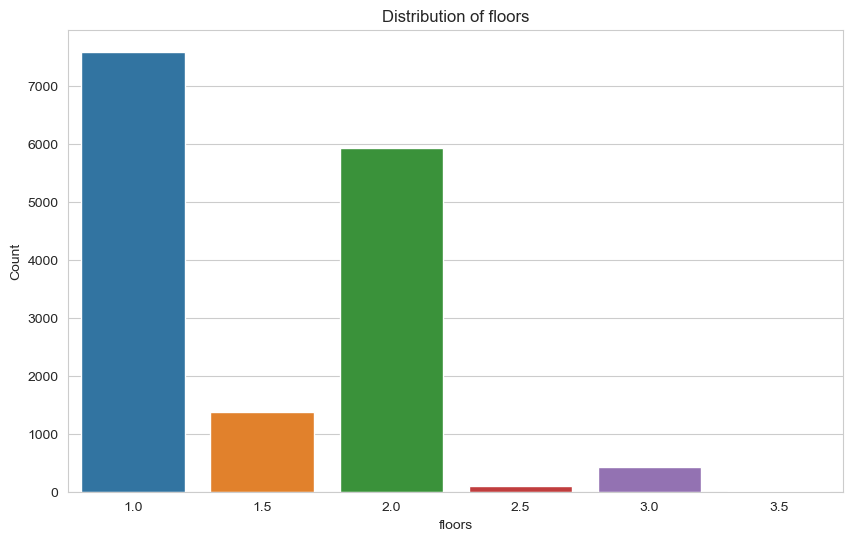

In [18]:
# 3. Categorical Variables Trends
categorical_vars = ['waterfront', 'floors']  # Example categorical variables
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, data=df_cleaned)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

4. **Correlation Matrix**: Visualize the correlation between numerical variables to identify potential relationships.

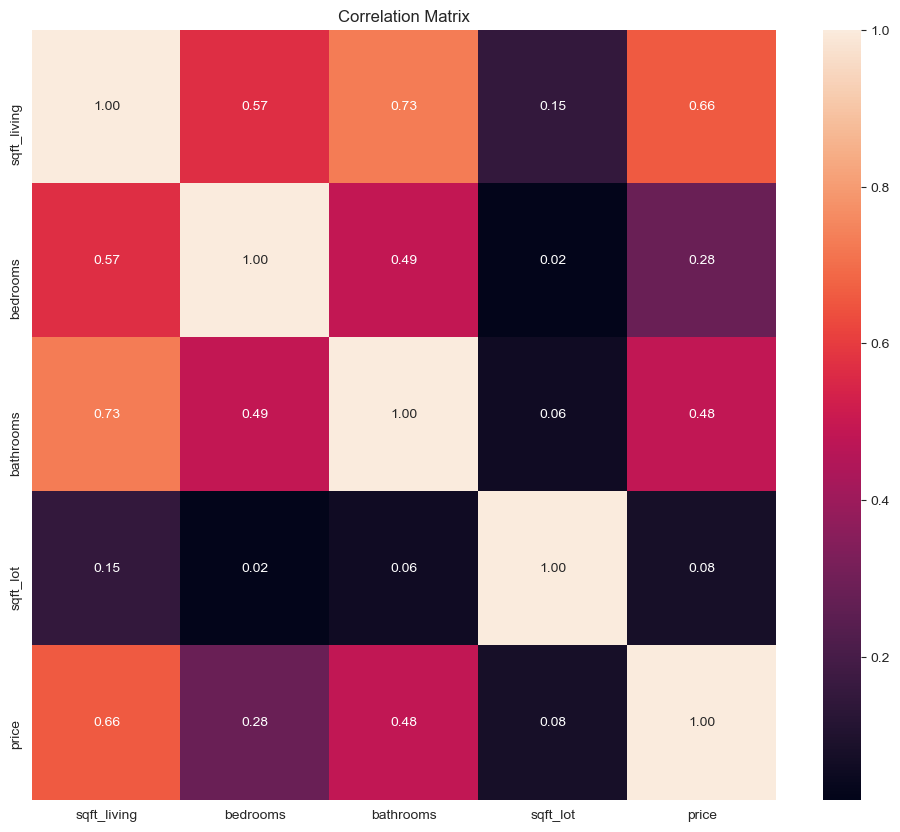

In [19]:
# 4. Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_cleaned[numerical_vars + ['price']].corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

5. **Pairwise Relationships**: Use pair plots to visualize pairwise relationships between key numerical variables.

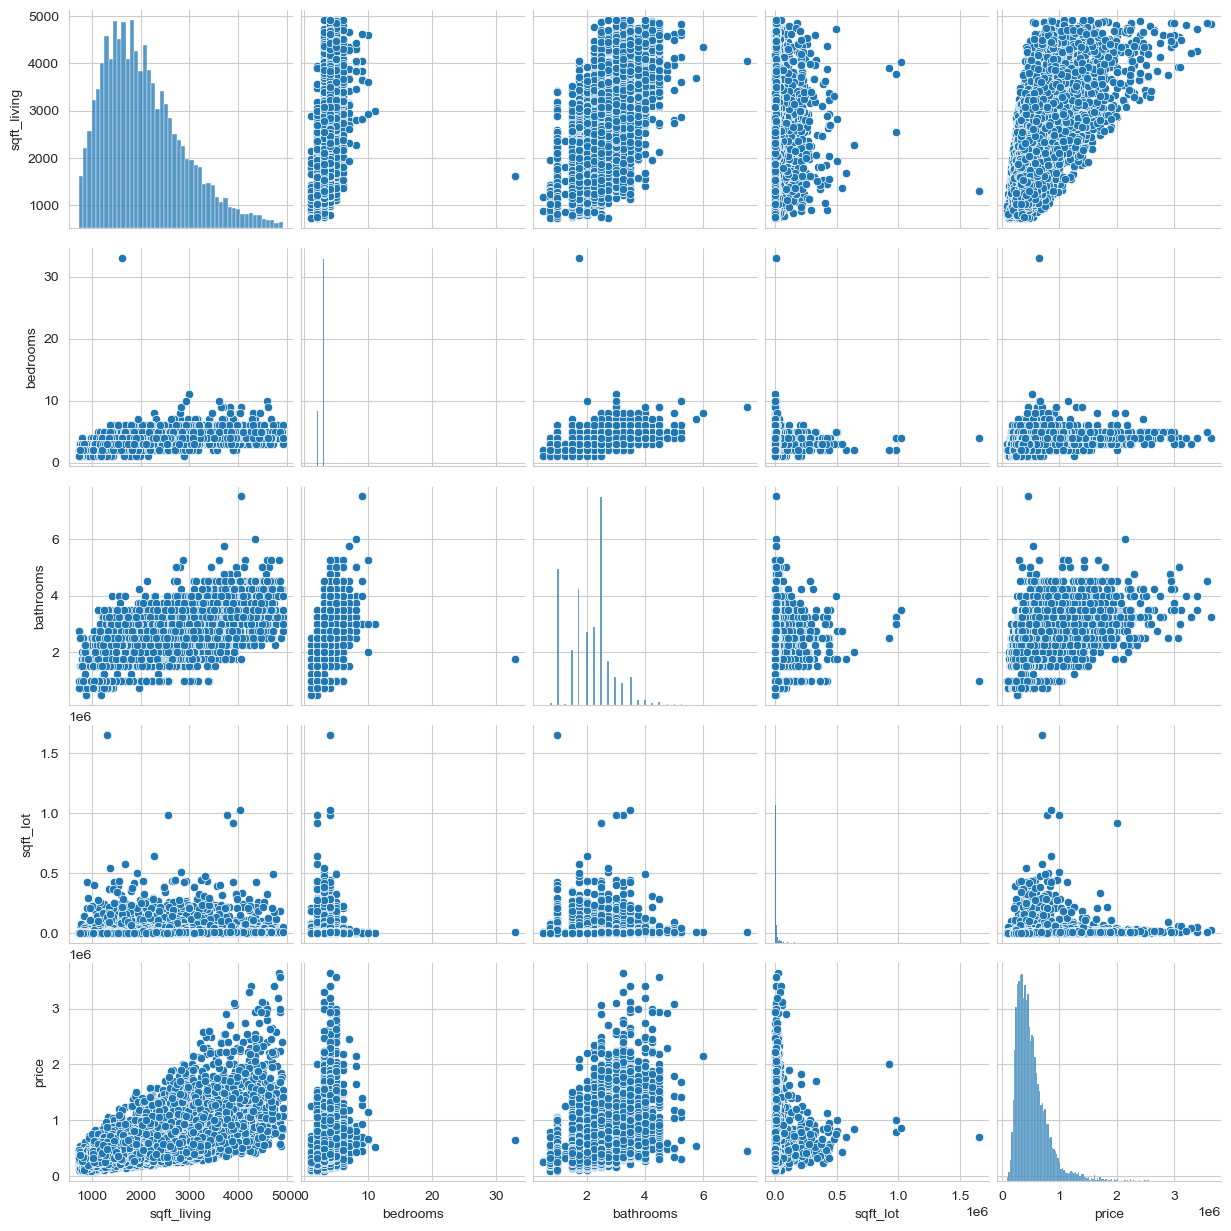

In [20]:
# 5. Pairwise Relationships
sns.pairplot(df_cleaned[numerical_vars + ['price']])
plt.show()

6. **Trends Over Time**: If there are date-time variables, plot trends over time to identify any temporal patterns.

/tmp/ipykernel_203887/1094359480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
/tmp/ipykernel_203887/1094359480.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['month_year'] = df_cleaned.index.to_period('M')


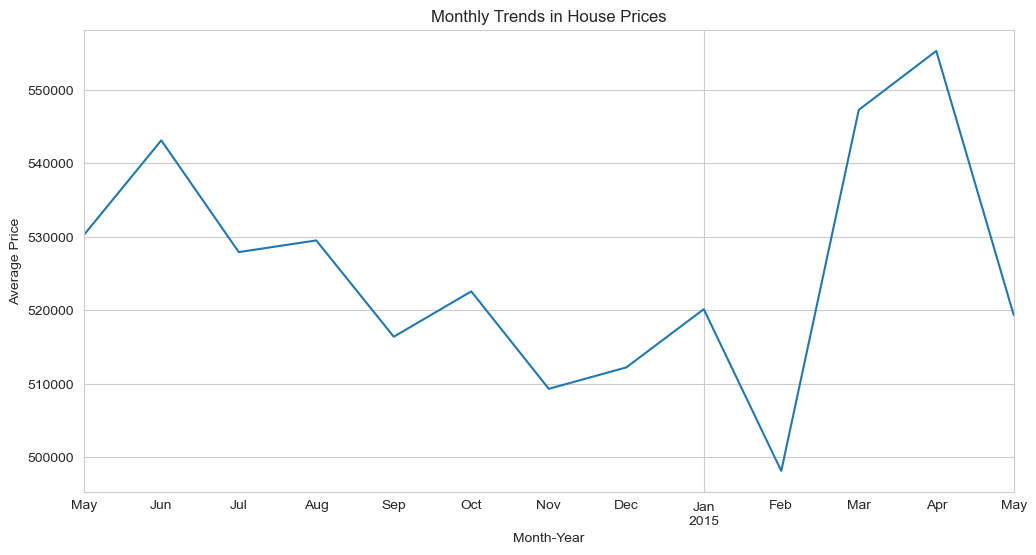

In [21]:
# 6. Trends Over Time (if applicable)
# Ensure 'date' column is datetime type and set as index
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
df_cleaned.set_index('date', inplace=True)

# Now, convert the index to a period ('M' for monthly periods)
df_cleaned['month_year'] = df_cleaned.index.to_period('M')

# Proceed with grouping and plotting
monthly_trends = df_cleaned.groupby('month_year').mean()['price']
plt.figure(figsize=(12, 6))
monthly_trends.plot(title='Monthly Trends in House Prices')
plt.xlabel('Month-Year')
plt.ylabel('Average Price')
plt.show()

In [22]:
df_cleaned['month_year'].unique()

<PeriodArray>
['2014-12', '2015-02', '2014-06', '2015-04', '2015-03', '2014-05', '2014-10',
 '2015-01', '2014-07', '2014-08', '2014-11', '2014-09', '2015-05']
Length: 13, dtype: period[M]



### 6. Feature Selection and Engineering
Decide which features to use and if any new features should be created.



This process will involve creating new features that could help improve model performance and selecting the most relevant features to use for modeling. The exact steps and code will depend on the specifics of your dataset, but here's a general approach:

### Feature Engineering
1. **Datetime Features**: If you have datetime columns, extract year, month, day, and day of the week.
2. **Categorical Features**: Convert categorical variables into dummy/indicator variables (one-hot encoding) or apply target encoding.
3. **Interaction Features**: Create interaction features by combining two or more features.
4. **Polynomial Features**: Generate polynomial and interaction features automatically.

### Feature Selection
1. **Remove Low Variance Features**: Eliminate features with little variance, as they likely don't contribute much information.
2. **Correlation Filter**: Remove highly correlated features to reduce multicollinearity.
3. **Use Model-based Feature Selection**: Utilize a model to determine the importance of features and select a subset.

### Implementation Example



In [24]:
df_cleaned.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month_year'],
      dtype='object')

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, VarianceThreshold
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming df is your DataFrame and 'target' is your target variable
X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']

# Feature Engineering
# For datetime features: Assuming 'date_column' is your datetime column
# X['year'] = X['date_column'].dt.year
# X['month'] = X['date_column'].dt.month

# For categorical features: Assuming 'cat_column' is your categorical column
categorical_features = ['cat_column']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
    ])

# Feature Selection
# Remove low variance features
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_reduced = sel.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Model-based Feature Selection
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf = clf.fit(X_train, y_train)

# Selecting features based on importance
model = SelectFromModel(clf, prefit=True)
X_important_train = model.transform(X_train)
X_important_test = model.transform(X_test)

# Now, X_important_train and X_important_test contain the most important features
# You can proceed with modeling using these datasets

KeyError: 'date_column'

In [27]:
from sklearn.preprocessing import OneHotEncoder

# Separate numerical and categorical features
numerical_features = [ 'bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'sqft_above']
categorical_features = ['grade']
# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(df_cleaned[categorical_features])
encoded_feature_names = encoder.get_feature_names(categorical_features)

In [29]:

# Create a new dataframe with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df_cleaned.index)

# Combine numerical and encoded features
final_df = pd.concat([df_cleaned[numerical_features], encoded_df], axis=1)

# Add the target variable (price) to the final dataframe
final_df['price'] = df_cleaned['price']

In [30]:
# Separate the target variable
X = final_df.drop('price', axis=1)
y = final_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 48333461540.494
R^2 Score: 0.5334029104023084




 The feature selection part uses a RandomForestClassifier to identify important features, but you can experiment with other models and techniques based on your specific needs and the insights gained from your EDA.

In [ ]:
# Example: Selecting features for the model
features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']
X = df[features]
y = df['price']



### 7. Model Building
Split your data into training and testing sets, build your model, and train it.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)



### 8. Model Evaluation
Evaluate your model's performance using appropriate metrics.



In [ ]:
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")



### 9. Interpretation of Results
Discuss the results, the impact of different features on house prices, and any recommendations for stakeholders.

Remember, this is just a starting point. You'll need to iterate on your models, possibly perform more detailed EDA, and refine your feature selection based on the results you get.